## FINAL PROJECT

### Group 3.


1.Lynn Achieng

2.Josephine Maro

3.Edmund Nyaribo

4.Troye Gilbert

5.Pascalia Maiga




## E-Commerce Recommender System
<p>
    <img src="Images/WhatsApp Image 2024-08-13 at 3.45.03 PM.jpeg" alt="readme Image"/>
</p>

## 1. Business Understanding

### 1.1 Overview


The project aims to develop a chatbot that provides personalized product recommendations to online shoppers. With the vast array of choices on platforms like Amazon and Jumia, consumers often find it overwhelming to make quick decisions. This chatbot will simplify the shopping experience by analyzing user preferences and suggesting the best products based on their specifications. The goal is to enhance customer satisfaction, reduce decision-making time, and increase sales for businesses by offering tailored recommendations that meet the users' needs efficiently. This solution addresses the common issue of choice overload in online shopping.      


## 2. Problem Statement

Consumers face overwhelming choices when shopping online, leading to decision fatigue and frustration. The challenge is finding products that meet specific needs among countless options. A personalized solution is needed to simplify this process. A hybrid recommender system can address this by providing tailored product suggestions based on individual preferences. By combining multiple recommendation techniques, such a system would streamline decision-making, reduce frustration, and enhance the shopping experience. This approach not only benefits consumers by offering relevant choices quickly but also helps businesses increase customer satisfaction and boost sales through more effective recommendations.

## 3. Objectives

1. Conduct Exploratory Data Analysis (EDA) to understand user behavior and product attributes.
2. Create an algorithm that matches user specifications with suitable products.
3. Develop a recommendation system that provides accurate and relevant product recommendations.
4. Develop a chatbot that is user-friendly and intuitive to enhance user experience. 
5. Iterate on the system based on continuous learning and data-driven insights.



## 4. Data Preparation.

In [1]:
# Importing necessary libraries
import pandas as pd
import json
import glob
import re
import string
import math


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


from surprise import Dataset, Reader, KNNBasic, SVD, NMF, KNNWithMeans, SVDpp
from surprise.model_selection import train_test_split
from surprise import accuracy as sup_accuracy
from surprise.prediction_algorithms.matrix_factorization import NMF
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.matrix_factorization import SVDpp
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV


import warnings
# Ignore future deprecation warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set_style('darkgrid')

#from Cleaner import DataProcessor, PerformanceMetrics, recommend_place, recommend_amenities, recommend_attraction, recommend_country,  RecommendationEngine

In [2]:
# Loading the data
df = pd.read_csv('data/FlikartProductSales.csv')
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights,image_links
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...,https://rukminim1.flixcart.com/image/612/612/x...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...,https://rukminim1.flixcart.com/image/612/612/x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g,https://rukminim1.flixcart.com/image/612/612/x...
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g,https://rukminim1.flixcart.com/image/612/612/k...
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...,https://rukminim1.flixcart.com/image/612/612/j...
...,...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,₹380,₹999,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN,https://rukminim1.flixcart.com/image/612/612/x...
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,₹179,₹299,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...,https://rukminim1.flixcart.com/image/612/612/k...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,₹354,₹600,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...,https://rukminim1.flixcart.com/image/612/612/k...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,₹498,₹599,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...,https://rukminim1.flixcart.com/image/612/612/j...


In [3]:
df.shape

(12041, 12)

In [4]:
df.dtypes

category_1         object
category_2         object
category_3         object
title              object
product_rating    float64
selling_price      object
mrp                object
seller_name        object
seller_rating     float64
description        object
highlights         object
image_links        object
dtype: object

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   category_1      12041 non-null  object 
 1   category_2      12041 non-null  object 
 2   category_3      12041 non-null  object 
 3   title           12023 non-null  object 
 4   product_rating  11961 non-null  float64
 5   selling_price   12013 non-null  object 
 6   mrp             11666 non-null  object 
 7   seller_name     11825 non-null  object 
 8   seller_rating   11827 non-null  float64
 9   description     5021 non-null   object 
 10  highlights      6560 non-null   object 
 11  image_links     12041 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


In [6]:
df.describe()

,product_rating,seller_rating
count,11961.000000,11827.000000
mean,4.061617,4.394538
std,0.345575,0.404288
min,1.000000,3.000000
25%,3.900000,4.100000
50%,4.100000,4.400000
75%,4.300000,4.700000
max,5.000000,5.000000


In [7]:
df.columns

Index(['category_1', 'category_2', 'category_3', 'title', 'product_rating',
       'selling_price', 'mrp', 'seller_name', 'seller_rating', 'description',
       'highlights', 'image_links'],
      dtype='object')

In [8]:
# Dropping the unnecessary columns
df.drop(['image_links'],axis=1,inplace=True)
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...
...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,₹380,₹999,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,₹179,₹299,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,₹354,₹600,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,₹498,₹599,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...


In [9]:
# Checking null values
df.isnull().sum()

category_1           0
category_2           0
category_3           0
title               18
product_rating      80
selling_price       28
mrp                375
seller_name        216
seller_rating      214
description       7020
highlights        5481
dtype: int64

In [10]:
# Inscpecting the title column
df[df['title'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,"Sports, Books and More",Food Essentials,Chocolates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1578,"Sports, Books and More",Industrial &Scientific tools,Packaging and Shipping Products,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1936,Electronics,Mobile Accessories,Screenguards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,Electronics,Smart Wearable Tech,Smart Watches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3557,Men's wear,Bottom Wear,Casual Trousers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4516,Men's wear,Innerwear and loungewear,Night Suits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4664,Men's wear,Watches,Titan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4776,Men's wear,Accessories,Backpacks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4867,Men's wear,Accessories,Belts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Filling the null value with "other"
df['title'].fillna('Other',inplace=True)
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...
...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,₹380,₹999,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,₹179,₹299,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,₹354,₹600,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,₹498,₹599,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...


In [12]:
df.title.isnull().sum()

0

In [13]:
# Checking the Product Rating column
df[df['product_rating'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,HERBALIFE Weight Loss Combo pack Formula 1 + P...,NaN,"₹2,710","₹4,476",NaN,NaN,Formula 1 Nutri nutritional requirements. Pack...,vitamins minerals protein
681,"Sports, Books and More",Food Essentials,Chocolates,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
721,"Sports, Books and More",Food Essentials,Gifting Combos,HERBALIFE Weight Loss Combo pack Formula 1 + P...,NaN,"₹2,710","₹4,476",NaN,NaN,Formula 1 Nutri nutritional requirements. Pack...,vitamins minerals protein
1438,"Sports, Books and More",Industrial &Scientific tools,Industrial Measurement Devices,DTTOOLS 25~50mm Micrometer Outside Screw Gauge...,NaN,₹889,"₹1,099",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11420,Home and Furniture,Home Improvement,Lawn and Gardening,Femily Organic STONE DUST powder for Plants Ma...,NaN,₹189,₹199,NaN,NaN,Calcium carbonate is used to help prevent the ...,"Manure, Potting Mixture, Fertilizer Used for A..."
11548,Home and Furniture,Home Décor,Clocks,BAREPEPE Digital Black Clock,NaN,NaN,NaN,NaN,NaN,NaN,Alarm Height x Width 100 mm x 160 mm Digital
11792,Home and Furniture,Home Lighting,Table Lamp,"META White Table Lamp Table Lamp (56 cm, White)",NaN,"₹2,999","₹5,000",NaN,NaN,"White Table lamp for home,bedroom,living room,...","Color: White, Gold Power Source: AC Adapter W ..."
11817,Home and Furniture,Home Lighting,Ceiling Lamp,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Replacing Nulls with 0 
df['product_rating'].fillna('0',inplace=True)
df['product_rating'].isnull().sum()


0

In [15]:
# Inspecting the selling price column
df[df['selling_price'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
681,"Sports, Books and More",Food Essentials,Chocolates,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
1578,"Sports, Books and More",Industrial &Scientific tools,Packaging and Shipping Products,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
1936,Electronics,Mobile Accessories,Screenguards,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
2156,Electronics,Smart Wearable Tech,Smart Watches,"alt OG Bluetooth Calling, 1.69"" HD Display wit...",4,NaN,NaN,NaN,NaN,With the amazing features of the alt OG smartw...,1.69� TFT LCD screen (240*280 px) Bluetooth ca...
2164,Electronics,Smart Wearable Tech,Smart Watches,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
2653,Electronics,Speakers,DTH Set Top Box,"Dish TV HD DTH, Hindi Family Saver Pack 1 Mont...",3,NaN,NaN,NaN,NaN,This offer includes DishTV HD set top box Conn...,NaN
3123,Men's wear,Foot Wear,Sneakers,BRUTON Lightweight Pack Of 1 Trendy Sneakers S...,3.7,NaN,NaN,NaN,NaN,NaN,NaN
3557,Men's wear,Bottom Wear,Casual Trousers,Other,0,NaN,NaN,NaN,NaN,NaN,NaN
4516,Men's wear,Innerwear and loungewear,Night Suits,Other,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['selling_price'].fillna('0',inplace=True)
df['selling_price'].isnull().sum()

0

In [17]:
# M
df[df['mrp'].isnull()]
df['mrp'].fillna('0',inplace=True)
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...
...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,₹380,₹999,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,₹179,₹299,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,₹354,₹600,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,₹498,₹599,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...


In [18]:
columns_to_clean = ['selling_price', 'mrp']

# Remove the rupee sign and commas, then convert to numeric for each column
for column in columns_to_clean:
    df[column] = df[column].replace({'₹': '', ',': ''}, regex=True).astype(float)

# Example conversion rate from INR to KES
conversion_rate = 0.76  

# Convert the Selling Price and Original Price from INR to KES
df['selling_price'] = df['selling_price'] * conversion_rate
df['mrp'] = df['mrp'] * conversion_rate
df

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,NaN,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,NaN,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,NaN,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...
...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,288.80,759.24,Twins enterprises,3.9,Wall Hanging Fish Bowl with Free Stones\nHigh ...,NaN
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,136.04,227.24,Nitishree pets,4.4,aquarium substrate can add a great contrast in...,Type: Sand Used For Salt Water and Fresh Water...
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,269.04,456.00,AquaxPetProducts,4.9,Taiyo Turtle Food 1Kg Suitable for your Turtle...,For Turtle Flavor: Chicken Food Type: Dry Suit...
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,378.48,455.24,Foodie Puppies Group,4.5,NaN,For Fish Flavor: NA Food Type: Dry Suitable Fo...


In [19]:
# Rename columns
df.rename(columns={
    'selling_price': 'selling_price(KSH.)',
    'mrp': 'mrp(KSH.)'
}, inplace=True)

In [20]:
# Inspecting the seller_name 
df[df['seller_name'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,description,highlights
40,"Sports, Books and More",Sports,Badminton,VICTOO SPORTS VICTOO PROFESIONAL BADMINTON Bad...,3.8,254.60,456.00,NaN,NaN,NaN,"Sport Type: Badminton Ideal For: Boys, Girls, ..."
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,Other,0,0.00,0.00,NaN,NaN,NaN,NaN
600,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,OPEN SECRET Snacks Combo | Nutty Cookies and N...,2.7,345.80,0.00,NaN,NaN,Nutty Spread - Choco Almond TASTY & HEALTHY: T...,NaN
607,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,HERBALIFE Weight Loss Combo pack Formula 1 + P...,0,2059.60,3401.76,NaN,NaN,Formula 1 Nutri nutritional requirements. Pack...,vitamins minerals protein
681,"Sports, Books and More",Food Essentials,Chocolates,Other,0,0.00,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11792,Home and Furniture,Home Lighting,Table Lamp,"META White Table Lamp Table Lamp (56 cm, White)",0,2279.24,3800.00,NaN,NaN,"White Table lamp for home,bedroom,living room,...","Color: White, Gold Power Source: AC Adapter W ..."
11817,Home and Furniture,Home Lighting,Ceiling Lamp,Other,0,0.00,0.00,NaN,NaN,NaN,NaN
11882,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts,SHANKAR PERFUMEERY WORKS Combo Pack - Aromatic...,4.1,209.00,0.00,NaN,NaN,NaN,Type: Incense Sticks Fragrance: A fresh fragra...
11904,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts,UNIBIC Season's Greetings|Christmas & New Year...,3.6,455.24,759.24,NaN,NaN,"Season's Greetings, Christmas & New Year Gift,...","Includes: Cake, Chocolate, Cookies Contents: 0..."


In [21]:
df['seller_name'].fillna('Null',inplace= True)
df['seller_name'].isnull().sum()

0

In [22]:
# Inspecting the selller_rating column
df[df['seller_rating'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,description,highlights
40,"Sports, Books and More",Sports,Badminton,VICTOO SPORTS VICTOO PROFESIONAL BADMINTON Bad...,3.8,254.60,456.00,Null,NaN,NaN,"Sport Type: Badminton Ideal For: Boys, Girls, ..."
310,"Sports, Books and More",Exercise Fitness,Cardio Equipment,Other,0,0.00,0.00,Null,NaN,NaN,NaN
600,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,OPEN SECRET Snacks Combo | Nutty Cookies and N...,2.7,345.80,0.00,Null,NaN,Nutty Spread - Choco Almond TASTY & HEALTHY: T...,NaN
607,"Sports, Books and More",Food Essentials,Nuts and Dry Fruits,HERBALIFE Weight Loss Combo pack Formula 1 + P...,0,2059.60,3401.76,Null,NaN,Formula 1 Nutri nutritional requirements. Pack...,vitamins minerals protein
681,"Sports, Books and More",Food Essentials,Chocolates,Other,0,0.00,0.00,Null,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11792,Home and Furniture,Home Lighting,Table Lamp,"META White Table Lamp Table Lamp (56 cm, White)",0,2279.24,3800.00,Null,NaN,"White Table lamp for home,bedroom,living room,...","Color: White, Gold Power Source: AC Adapter W ..."
11817,Home and Furniture,Home Lighting,Ceiling Lamp,Other,0,0.00,0.00,Null,NaN,NaN,NaN
11882,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts,SHANKAR PERFUMEERY WORKS Combo Pack - Aromatic...,4.1,209.00,0.00,Null,NaN,NaN,Type: Incense Sticks Fragrance: A fresh fragra...
11904,Home and Furniture,Festive Decor and Gifts,Festive Decor and Gifts,UNIBIC Season's Greetings|Christmas & New Year...,3.6,455.24,759.24,Null,NaN,"Season's Greetings, Christmas & New Year Gift,...","Includes: Cake, Chocolate, Cookies Contents: 0..."


In [23]:
df['seller_rating'].fillna('0',inplace=True)
df['seller_rating'].isnull().sum()

0

In [24]:
# Dropping columns not needed for the analysis
df.drop(['description'],axis=1,inplace=True)
df.drop(['highlights'],axis=1,inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12041 entries, 0 to 12040
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_1           12041 non-null  object 
 1   category_2           12041 non-null  object 
 2   category_3           12041 non-null  object 
 3   title                12041 non-null  object 
 4   product_rating       12041 non-null  object 
 5   selling_price(KSH.)  12041 non-null  float64
 6   mrp(KSH.)            12041 non-null  float64
 7   seller_name          12041 non-null  object 
 8   seller_rating        12041 non-null  object 
dtypes: float64(2), object(7)
memory usage: 846.8+ KB


In [26]:
df2 = pd.read_csv('data/Flipkart_Mobiles.csv')
df2

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [27]:
# Renaming columns for uniformity
df2 = df2.rename(columns={
    'Brand': 'Brand/Model',
    'Model': 'Model',
    'Color': 'Color',
    'Memory': 'Memory',
    'Storage': 'Storage',
    'Rating': 'product_rating',
    'Selling Price': 'selling_price(KSH.)',
    'Original Price': 'mrp(KSH.)'
})
df2

,Brand/Model,Model,Color,Memory,Storage,product_rating,selling_price(KSH.),mrp(KSH.)
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [28]:
df2 = pd.read_csv('data/Flipkart_Mobiles.csv')
df2

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [29]:
df2.columns

Index(['Brand', 'Model', 'Color', 'Memory', 'Storage', 'Rating',
       'Selling Price', 'Original Price'],
      dtype='object')

In [30]:
# Renaming columns for uniformity
df2 = df2.rename(columns={
    'Brand': 'Brand/Model',
    'Model': 'Model',
    'Color': 'Color',
    'Memory': 'Memory',
    'Storage': 'Storage',
    'Rating': 'product_rating',
    'Selling Price': 'selling_price(KSH.)',
    'Original Price': 'mrp(KSH.)'
})
df2

,Brand/Model,Model,Color,Memory,Storage,product_rating,selling_price(KSH.),mrp(KSH.)
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


In [31]:
# Adding placeholder columns to df2 to match df1
df2['category_1'] = 'Electronics'
df2['category_2'] = 'Mobiles'
df2['category_3'] = df2['Brand/Model'] + " " + df2['Model']
df2['title'] =  df2['Color'] + " " + df2['Memory'] + " " + df2['Storage'] + " " + df2['category_3']
df2['seller_name'] = 'Unknown'
df2['seller_rating'] = 0
df2['price_ratio'] = df2['selling_price(KSH.)'] / df2['mrp(KSH.)']
df2['price_difference'] = df2['mrp(KSH.)'] - df2['selling_price(KSH.)']
df2

,Brand/Model,Model,Color,Memory,Storage,product_rating,selling_price(KSH.),mrp(KSH.),category_1,category_2,category_3,title,seller_name,seller_rating,price_ratio,price_difference
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Moonlight Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Mint Cream 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990,Electronics,Mobiles,OPPO A53,Moonlight Black 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990,Electronics,Mobiles,OPPO A53,Mint Cream 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Electric Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990,Electronics,Mobiles,SAMSUNG M52 5G,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449,Electronics,Mobiles,SAMSUNG M52 5G,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.895954,2960
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489,Electronics,Mobiles,SAMSUNG M52 5G,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.865032,4250
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989,Electronics,Mobiles,SAMSUNG M52 5G,Slate Black 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0


In [32]:
df2.columns

Index(['Brand/Model', 'Model', 'Color', 'Memory', 'Storage', 'product_rating',
       'selling_price(KSH.)', 'mrp(KSH.)', 'category_1', 'category_2',
       'category_3', 'title', 'seller_name', 'seller_rating', 'price_ratio',
       'price_difference'],
      dtype='object')

In [33]:
# Columns to drop after joining them into title.
columns_to_drop = ['Brand/Model', 'Model', 'Color', 'Memory', 'Storage']
df2.drop(columns=columns_to_drop, inplace=True)
df2

,product_rating,selling_price(KSH.),mrp(KSH.),category_1,category_2,category_3,title,seller_name,seller_rating,price_ratio,price_difference
0,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Moonlight Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
1,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Mint Cream 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
2,4.3,13990,17990,Electronics,Mobiles,OPPO A53,Moonlight Black 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
3,4.3,13990,17990,Electronics,Mobiles,OPPO A53,Mint Cream 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
4,4.5,11990,15990,Electronics,Mobiles,OPPO A53,Electric Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
...,...,...,...,...,...,...,...,...,...,...,...
3109,4.3,25990,25990,Electronics,Mobiles,SAMSUNG M52 5G,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0
3110,4.3,25489,28449,Electronics,Mobiles,SAMSUNG M52 5G,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.895954,2960
3111,4.3,27239,31489,Electronics,Mobiles,SAMSUNG M52 5G,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.865032,4250
3112,4.2,22989,22989,Electronics,Mobiles,SAMSUNG M52 5G,Slate Black 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0


In [34]:
# Extract the first name in the category_3 column
df2['category_3'] = df2['category_3'].apply(lambda x: x.split()[0])
df2

,product_rating,selling_price(KSH.),mrp(KSH.),category_1,category_2,category_3,title,seller_name,seller_rating,price_ratio,price_difference
0,4.5,11990,15990,Electronics,Mobiles,OPPO,Moonlight Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
1,4.5,11990,15990,Electronics,Mobiles,OPPO,Mint Cream 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
2,4.3,13990,17990,Electronics,Mobiles,OPPO,Moonlight Black 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
3,4.3,13990,17990,Electronics,Mobiles,OPPO,Mint Cream 6 GB 128 GB OPPO A53,Unknown,0,0.777654,4000
4,4.5,11990,15990,Electronics,Mobiles,OPPO,Electric Black 4 GB 64 GB OPPO A53,Unknown,0,0.749844,4000
...,...,...,...,...,...,...,...,...,...,...,...
3109,4.3,25990,25990,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0
3110,4.3,25489,28449,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.895954,2960
3111,4.3,27239,31489,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,0.865032,4250
3112,4.2,22989,22989,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,Unknown,0,1.000000,0


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_rating       2970 non-null   float64
 1   selling_price(KSH.)  3114 non-null   int64  
 2   mrp(KSH.)            3114 non-null   int64  
 3   category_1           3114 non-null   object 
 4   category_2           3114 non-null   object 
 5   category_3           3114 non-null   object 
 6   title                3032 non-null   object 
 7   seller_name          3114 non-null   object 
 8   seller_rating        3114 non-null   int64  
 9   price_ratio          3114 non-null   float64
 10  price_difference     3114 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 267.7+ KB


In [36]:
# Concatenate the dataframes
merged_df = pd.concat([df, df2], ignore_index=True)
merged_df

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,NaN,NaN
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,NaN,NaN
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,NaN,NaN
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,NaN,NaN
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15150,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,4.3,25990.00,25990.00,Unknown,0,1.000000,0.0
15151,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,4.3,25489.00,28449.00,Unknown,0,0.895954,2960.0
15152,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,4.3,27239.00,31489.00,Unknown,0,0.865032,4250.0
15153,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,4.2,22989.00,22989.00,Unknown,0,1.000000,0.0


In [37]:
merged_df = merged_df.copy()
merged_df.loc[:, 'ID'] = range(1, len(merged_df) + 1)
#merged_df['ID'] = range(1, len(merged_df) + 1)
merged_df.set_index('ID', drop=False)
merged_df.columns
merged_df

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference,ID
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,NaN,NaN,1
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,NaN,NaN,2
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,NaN,NaN,3
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,NaN,NaN,4
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15150,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,4.3,25990.00,25990.00,Unknown,0,1.000000,0.0,15151
15151,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,4.3,25489.00,28449.00,Unknown,0,0.895954,2960.0,15152
15152,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,4.3,27239.00,31489.00,Unknown,0,0.865032,4250.0,15153
15153,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,4.2,22989.00,22989.00,Unknown,0,1.000000,0.0,15154


In [38]:
# Total number of missing values
total_missing = merged_df.isnull().sum().sum()

# Total number of values
total_values = merged_df.size

# Percentage of missing values
percentage_missing = (total_missing / total_values) * 100

print(f'Percentage of missing values: {percentage_missing:.2f}%')

Percentage of missing values: 13.37%


In [39]:
# Assuming df is your DataFrame
def calculate_missing_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100
    return missing_percentage

# Example usage
missing_percentage = calculate_missing_percentage(merged_df)
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
category_1              0.000000
category_2              0.000000
category_3              0.000000
title                   0.541076
product_rating          0.950181
selling_price(KSH.)     0.000000
mrp(KSH.)               0.000000
seller_name             0.000000
seller_rating           0.000000
price_ratio            79.452326
price_difference       79.452326
ID                      0.000000
dtype: float64


In [40]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15155 entries, 0 to 15154
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_1           15155 non-null  object 
 1   category_2           15155 non-null  object 
 2   category_3           15155 non-null  object 
 3   title                15073 non-null  object 
 4   product_rating       15011 non-null  object 
 5   selling_price(KSH.)  15155 non-null  float64
 6   mrp(KSH.)            15155 non-null  float64
 7   seller_name          15155 non-null  object 
 8   seller_rating        15155 non-null  object 
 9   price_ratio          3114 non-null   float64
 10  price_difference     3114 non-null   float64
 11  ID                   15155 non-null  int32  
dtypes: float64(4), int32(1), object(7)
memory usage: 1.3+ MB


In [41]:
# Assuming df is your DataFrame
def calculate_missing_percentage(merged_df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100
    return missing_percentage

# Example usage
missing_percentage = calculate_missing_percentage(merged_df)
print("Percentage of Missing Values in Each Column:")
print(missing_percentage)

Percentage of Missing Values in Each Column:
category_1             0.0
category_2             0.0
category_3             0.0
title                  0.0
product_rating         0.0
selling_price(KSH.)    0.0
mrp(KSH.)              0.0
seller_name            0.0
seller_rating          0.0
dtype: float64


In [42]:
# Replace missing data with 'Unknown'
merged_df= merged_df.dropna(subset=['title'])
merged_df['title'].isnull().sum()

0

In [43]:
merged_df[merged_df['product_rating'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference,ID
12078,Electronics,Mobiles,OPPO,Pearl Blue 4 GB 64 GB OPPO A16,NaN,13850.0,13850.0,Unknown,0,1.000000,0.0,12079
12082,Electronics,Mobiles,OPPO,CRYSTAL BLACK 4 GB 64 GB OPPO A16,NaN,13990.0,15990.0,Unknown,0,0.874922,2000.0,12083
12169,Electronics,Mobiles,OPPO,Crystal Black 4 GB 64 GB OPPO A16,NaN,13490.0,13490.0,Unknown,0,1.000000,0.0,12170
12186,Electronics,Mobiles,OPPO,Glowing Gold 6 GB 128 GB OPPO F19s,NaN,19990.0,22990.0,Unknown,0,0.869508,3000.0,12187
12187,Electronics,Mobiles,OPPO,Glowing Black 6 GB 128 GB OPPO F19s,NaN,19990.0,22990.0,Unknown,0,0.869508,3000.0,12188
...,...,...,...,...,...,...,...,...,...,...,...,...
15072,Electronics,Mobiles,ASUS,Storm White 8 GB 128 GB ASUS ROG 5s,NaN,49999.0,55999.0,Unknown,0,0.892855,6000.0,15073
15073,Electronics,Mobiles,ASUS,Phantom Black 8 GB 128 GB ASUS ROG 5s,NaN,49999.0,55999.0,Unknown,0,0.892855,6000.0,15074
15074,Electronics,Mobiles,ASUS,Storm White 12 GB 256 GB ASUS ROG 5s,NaN,57999.0,63999.0,Unknown,0,0.906249,6000.0,15075
15075,Electronics,Mobiles,ASUS,Phantom Black 12 GB 256 GB ASUS ROG 5s,NaN,57999.0,63999.0,Unknown,0,0.906249,6000.0,15076


In [44]:
# Replace NaN values in the 'product_rating' column with 0
merged_df['product_rating'] = merged_df['product_rating'].fillna(0)
merged_df['product_rating'].isnull().sum()

<ipython-input-44-3b02ce071bba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['product_rating'] = merged_df['product_rating'].fillna(0)


0

In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15073 entries, 0 to 15154
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_1           15073 non-null  object 
 1   category_2           15073 non-null  object 
 2   category_3           15073 non-null  object 
 3   title                15073 non-null  object 
 4   product_rating       15073 non-null  object 
 5   selling_price(KSH.)  15073 non-null  float64
 6   mrp(KSH.)            15073 non-null  float64
 7   seller_name          15073 non-null  object 
 8   seller_rating        15073 non-null  object 
 9   price_ratio          3032 non-null   float64
 10  price_difference     3032 non-null   float64
 11  ID                   15073 non-null  int32  
dtypes: float64(4), int32(1), object(7)
memory usage: 1.4+ MB


In [46]:
merged_df[merged_df['price_ratio'].isnull()]

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference,ID
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,NaN,NaN,1
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,NaN,NaN,2
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,NaN,NaN,3
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,NaN,NaN,4
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12036,Home and Furniture,Pet Supplies,Fish and Aquatics,TWINS TWINS Wall Hanging Fish Bowl II Wall Mou...,3.9,288.80,759.24,Twins enterprises,3.9,NaN,NaN,12037
12037,Home and Furniture,Pet Supplies,Fish and Aquatics,Nitishree Sugar Black Sand Gravel for Aquarium...,4.2,136.04,227.24,Nitishree pets,4.4,NaN,NaN,12038
12038,Home and Furniture,Pet Supplies,Fish and Aquatics,TAIYO Gold Toyko Turtle Food 1 Kg Chicken 1 kg...,4.4,269.04,456.00,AquaxPetProducts,4.9,NaN,NaN,12039
12039,Home and Furniture,Pet Supplies,Fish and Aquatics,pcg Eastern Flavors Optimum Fish Food (importe...,4.4,378.48,455.24,Foodie Puppies Group,4.5,NaN,NaN,12040


In [47]:
merged_df['price_ratio'] = merged_df['selling_price(KSH.)'] / merged_df['mrp(KSH.)']
merged_df['price_difference'] = merged_df['selling_price(KSH.)'] - merged_df['mrp(KSH.)']
merged_df

<ipython-input-47-40be482aae37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['price_ratio'] = merged_df['selling_price(KSH.)'] / merged_df['mrp(KSH.)']
<ipython-input-47-40be482aae37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['price_difference'] = merged_df['selling_price(KSH.)'] - merged_df['mrp(KSH.)']


,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference,ID
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,0.403750,-1812.60,1
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,0.253333,-340.48,2
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,0.296482,-106.40,3
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,0.250836,-170.24,4
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,0.235168,-813.20,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15150,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,4.3,25990.00,25990.00,Unknown,0,1.000000,0.00,15151
15151,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,4.3,25489.00,28449.00,Unknown,0,0.895954,-2960.00,15152
15152,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,4.3,27239.00,31489.00,Unknown,0,0.865032,-4250.00,15153
15153,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,4.2,22989.00,22989.00,Unknown,0,1.000000,0.00,15154


In [48]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15073 entries, 0 to 15154
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_1           15073 non-null  object 
 1   category_2           15073 non-null  object 
 2   category_3           15073 non-null  object 
 3   title                15073 non-null  object 
 4   product_rating       15073 non-null  object 
 5   selling_price(KSH.)  15073 non-null  float64
 6   mrp(KSH.)            15073 non-null  float64
 7   seller_name          15073 non-null  object 
 8   seller_rating        15073 non-null  object 
 9   price_ratio          15045 non-null  float64
 10  price_difference     15073 non-null  float64
 11  ID                   15073 non-null  int32  
dtypes: float64(4), int32(1), object(7)
memory usage: 1.4+ MB


In [49]:
merged_df['price_ratio'] = merged_df['price_ratio'].fillna(0)
merged_df

<ipython-input-49-2a5fc4493da0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['price_ratio'] = merged_df['price_ratio'].fillna(0)


,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference,ID
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,0.403750,-1812.60,1
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,0.253333,-340.48,2
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,0.296482,-106.40,3
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,0.250836,-170.24,4
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,0.235168,-813.20,5
...,...,...,...,...,...,...,...,...,...,...,...,...
15150,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,4.3,25990.00,25990.00,Unknown,0,1.000000,0.00,15151
15151,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,4.3,25489.00,28449.00,Unknown,0,0.895954,-2960.00,15152
15152,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,4.3,27239.00,31489.00,Unknown,0,0.865032,-4250.00,15153
15153,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,4.2,22989.00,22989.00,Unknown,0,1.000000,0.00,15154


In [50]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15073 entries, 0 to 15154
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   category_1           15073 non-null  object 
 1   category_2           15073 non-null  object 
 2   category_3           15073 non-null  object 
 3   title                15073 non-null  object 
 4   product_rating       15073 non-null  object 
 5   selling_price(KSH.)  15073 non-null  float64
 6   mrp(KSH.)            15073 non-null  float64
 7   seller_name          15073 non-null  object 
 8   seller_rating        15073 non-null  object 
 9   price_ratio          15073 non-null  float64
 10  price_difference     15073 non-null  float64
 11  ID                   15073 non-null  int32  
dtypes: float64(4), int32(1), object(7)
memory usage: 1.4+ MB


In [51]:
merged_df.tail(5)

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference,ID
15150,Electronics,Mobiles,SAMSUNG,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,4.3,25990.0,25990.0,Unknown,0,1.000000,0.0,15151
15151,Electronics,Mobiles,SAMSUNG,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,4.3,25489.0,28449.0,Unknown,0,0.895954,-2960.0,15152
15152,Electronics,Mobiles,SAMSUNG,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,4.3,27239.0,31489.0,Unknown,0,0.865032,-4250.0,15153
15153,Electronics,Mobiles,SAMSUNG,Slate Black 8 GB 128 GB SAMSUNG M52 5G,4.2,22989.0,22989.0,Unknown,0,1.000000,0.0,15154
15154,Electronics,Mobiles,SAMSUNG,Sky Blue 8 GB 128 GB SAMSUNG M52 5G,4.2,20350.0,22595.0,Unknown,0,0.900642,-2245.0,15155


In [52]:
merged_df.head(5)

,category_1,category_2,category_3,title,product_rating,selling_price(KSH.),mrp(KSH.),seller_name,seller_rating,price_ratio,price_difference,ID
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,1227.40,3040.00,I2SERVICES,4.4,0.403750,-1812.60,1
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,115.52,456.00,I2SERVICES,4.4,0.253333,-340.48,2
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,44.84,151.24,VictoryOutlets,4.7,0.296482,-106.40,3
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,57.00,227.24,VictoryOutlets,4.7,0.250836,-170.24,4
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,250.04,1063.24,IndiaFit,4.7,0.235168,-813.20,5


## EDA

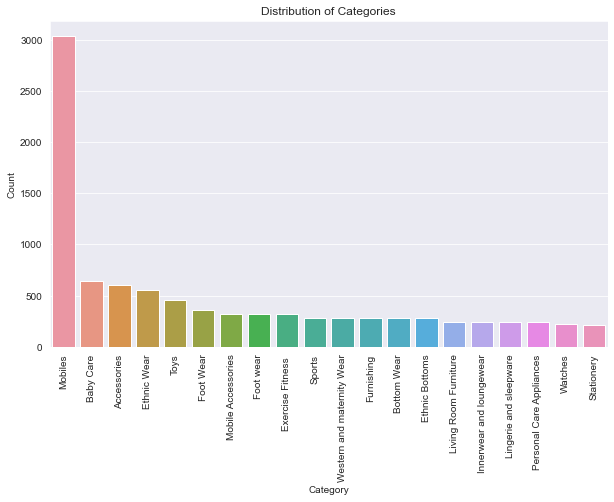

In [53]:
# Plot top 20 category_2 distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category_2', data=merged_df, order=merged_df.category_2.value_counts().index[:20])
plt.title('Distribution of Categories')
plt.xticks(rotation = 90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [54]:
merged_df['category_3'].value_counts()

SAMSUNG                   696
Apple                     369
realme                    294
OPPO                      260
Nokia                     209
                         ... 
Smart Bands                 5
Sports and Action           5
Gaming and Accessories      5
DSLR and Mirrorless         5
Headphones & Headsets       5
Name: category_3, Length: 317, dtype: int64

In [55]:
# Top 10 category 2 distribution
category_counts = merged_df['category_2'].value_counts().sort_values(ascending=False)
top_10_category = category_counts.head(10)  # Select top 10 category
top_10_category

Mobiles               3032
Baby Care              640
Accessories            600
Ethnic Wear            560
Toys                   458
Foot Wear              360
Mobile Accessories     325
Foot wear              320
Exercise Fitness       320
Sports                 280
Name: category_2, dtype: int64

In [56]:
#list to hold top 5 category 3 and their counts for top 10 category 2
top_5_category_3_per_category_2 = []
# for loop over top 10 category 2
for category in top_10_category.index:
    category_df = merged_df.loc[merged_df['category_2']==category].groupby(['category_3'])['category_3'].count().sort_values(ascending=False)[:5]
    curr_top_5_category = list(category_df.index)
    top_5_value_counts = list(category_df.values)
    top_5_dict = dict(zip(curr_top_5_category, top_5_value_counts))
    top_5_category_3_per_category_2.append({category: top_5_dict})
top_5_category_3_per_category_2

[{'Mobiles': {'SAMSUNG': 696,
   'Apple': 369,
   'realme': 294,
   'OPPO': 260,
   'Nokia': 209}},
 {'Baby Care': {'Wipes ': 40,
   'Nursing and Breast Feeding ': 40,
   'Diapers ': 40,
   'Baby Proofing and Safety ': 40,
   'Baby Oral Care ': 40}},
 {'Accessories': {'Sunglasses ': 80,
   'Luggage and Travel ': 80,
   'Wallets and Belts ': 40,
   'Wallets ': 40,
   'Totes ': 40}},
 {'Ethnic Wear': {'Sherwanis ': 40,
   'Sarees ': 40,
   'Lungi ': 40,
   'Lehenga Choli ': 40,
   'Kurtas and Kurtis ': 40}},
 {'Toys': {'Toy Guns ': 40,
   'Soft Toys ': 40,
   'Remote Control Toys ': 40,
   'Puzzles ': 40,
   'Party Supplies ': 40}},
 {'Foot Wear': {'Sports Shoes ': 40,
   'Sneakers ': 40,
   'Sandals and Floaters ': 40,
   'Running Shoes ': 40,
   'Loafers ': 40}},
 {'Mobile Accessories': {'Smart Headphones': 40,
   'Screenguards': 40,
   'Power Banks': 40,
   'Mobile Holders': 40,
   'Mobile Chargers': 40}},
 {'Foot wear': {'Wedges ': 40,
   'Sports Shoes ': 40,
   "Slippers and Flip -F

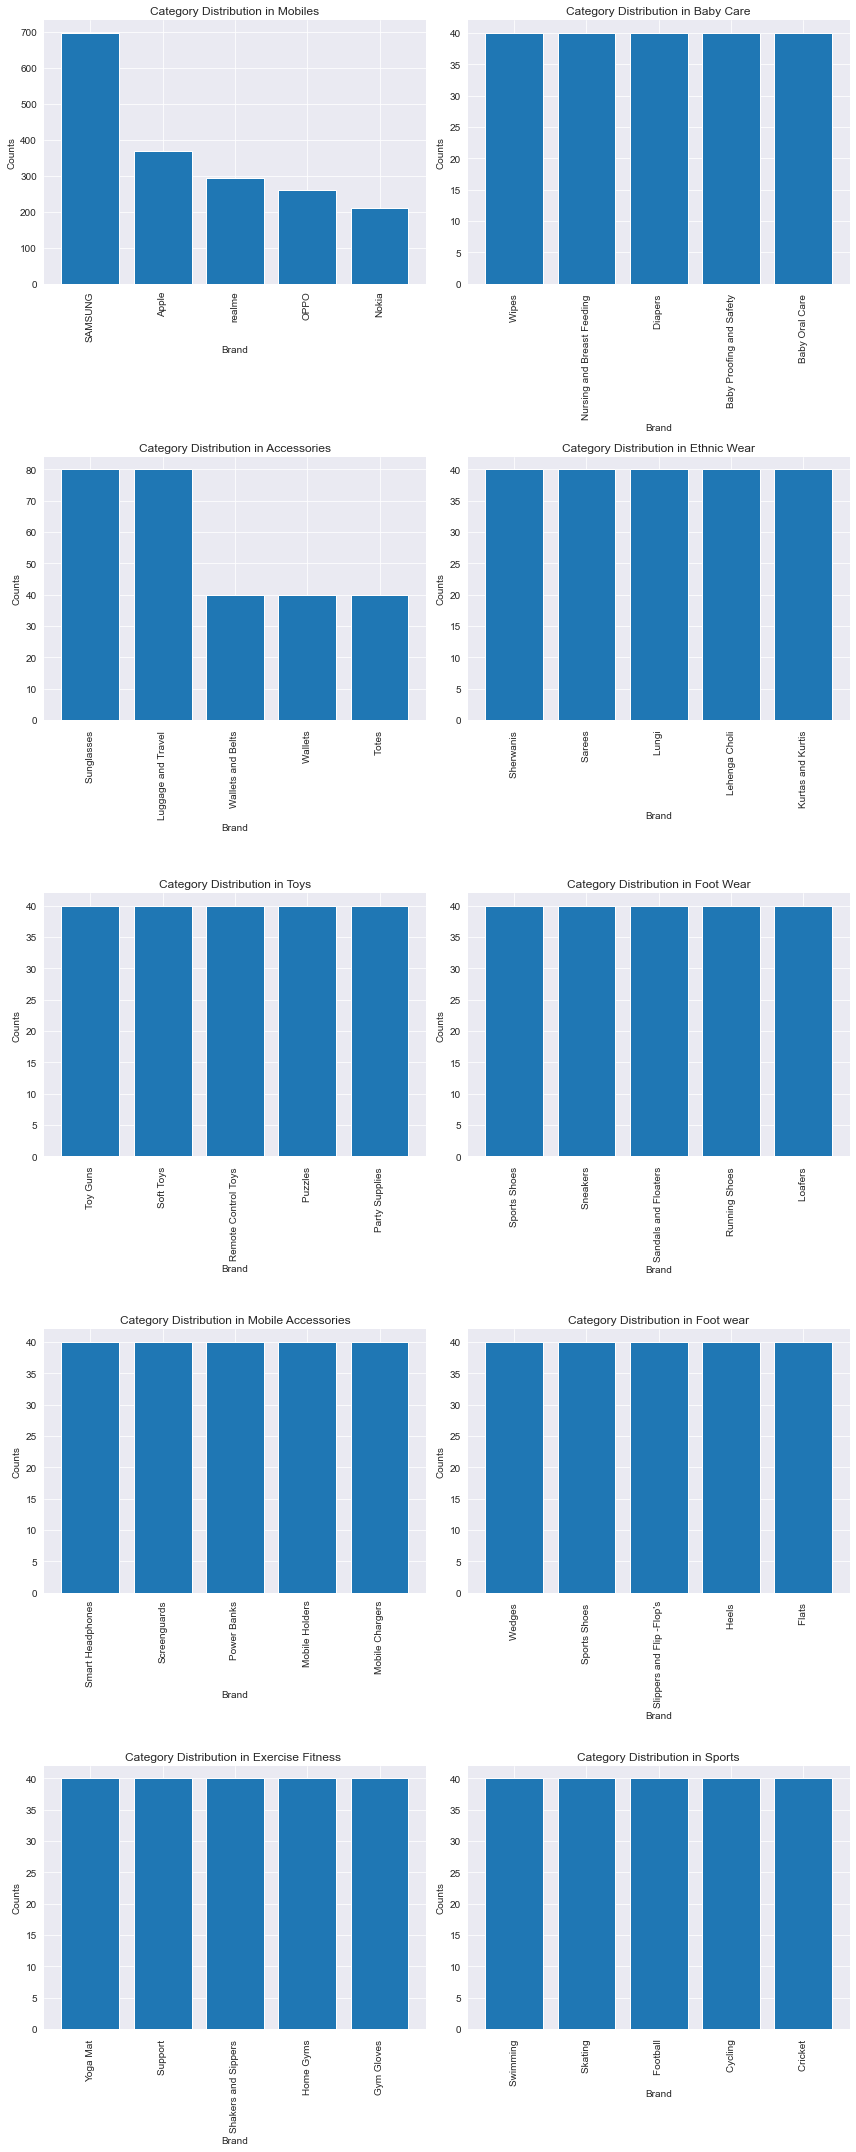

In [57]:
# Setting dark grid
sns.set_style('darkgrid')

# Calculate the number of rows and columns based on the number of bar plots
num_charts = len(top_5_category_3_per_category_2)
num_rows = math.ceil(num_charts / 2)
num_cols = min(num_charts, 2)

# Create subplots with the specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
axs = axs.flatten()  # Flatten the axes array for easier indexing

# Loop over the list of dictionaries and create bar plots
for i, d in enumerate(top_5_category_3_per_category_2):
    # Get the Category name and brand dictionary
    category2, brand = list(d.items())[0]

    # Get the counts and labels for the bar plot
    counts = list(brand.values())
    labels = list(brand.keys())

    # Create the bar plot
    axs[i].bar(labels, counts)
    axs[i].set_title(f'Category Distribution in {category2}')
    axs[i].set_xlabel('Brand')
    axs[i].set_ylabel('Counts')
    axs[i].tick_params(axis='x', rotation=90)
    sns.despine(left=True, bottom=True)

# Remove any empty subplots if the number of charts is not a multiple of 2
if num_charts % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

<ipython-input-58-799a81d1076c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['product_rating'] = merged_df['product_rating'].astype("float")


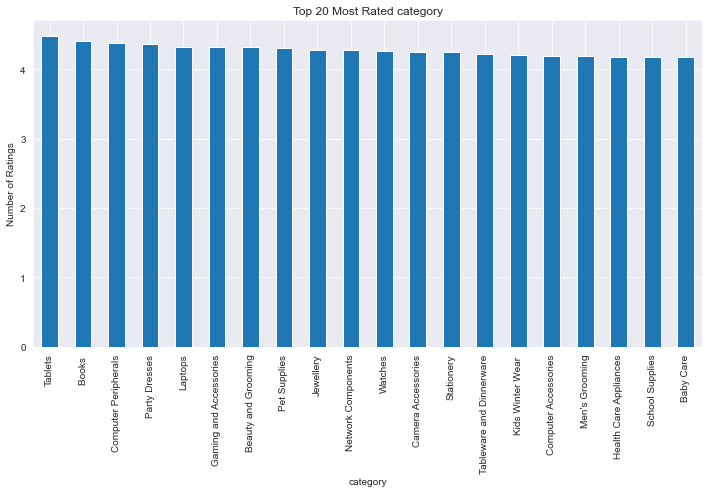

In [58]:
merged_df['product_rating'] = merged_df['product_rating'].astype("float")

# Count ratings per category 2
top_rated_category = merged_df.groupby('category_2')['product_rating'].mean().sort_values(ascending=False)[:20]

# Plot top 20 rated Category 2
plt.figure(figsize=(12, 6))
top_rated_category.plot(kind='bar')
plt.title('Top 20 Most Rated category')
plt.xlabel('category')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.show()

In [59]:
#list to hold top 5 category 3 prices for each category 2
top_5_category_3_per_category_2 = []
# for loop over top 10 Category 2
for category in top_10_category.index:
    category_df = merged_df.loc[merged_df['category_2']==category].groupby(['category_3'])['selling_price(KSH.)'].mean().sort_values(ascending=False)[:5]
    curr_top_5_category = list(category_df.index)
    top_5_value_counts = list(category_df.values)
    top_5_dict = dict(zip(curr_top_5_category, top_5_value_counts))
    top_5_category_3_per_category_2.append({category: top_5_dict})
top_5_category_3_per_category_2

[{'Mobiles': {'Apple': 80001.66124661246,
   'Google': 61391.862068965514,
   'IQOO': 37190.0,
   'HTC': 28314.381818181817,
   'SAMSUNG': 25035.25}},
 {'Baby Care': {'Baby Gear ': 1213.1499999999999,
   'Baby Bathing Accessories ': 700.0740000000002,
   'Diapers ': 568.1380000000001,
   'Baby Medical and Health Care ': 551.95,
   'Nursing and Breast Feeding ': 491.6250000000001}},
 {'Accessories': {'Luggage and Travel ': 2280.8264999999988,
   'Frames': 710.1440000000001,
   'Frames ': 610.3180000000002,
   'Backpacks ': 569.1450000000003,
   'Totes ': 515.0519999999999}},
 {'Ethnic Wear': {'Sherwanis ': 1583.802,
   'Ethnic Sets ': 594.0730000000001,
   'Kurta Sets and Salwar Suits ': 536.826,
   'Lehenga Choli ': 515.4130000000001,
   'Dhoti ': 451.2880000000001}},
 {'Toys': {'Helicopter and Drones ': 2145.6066666666666,
   'Outdoor Toys ': 1982.6119999999992,
   'Dolls and Doll Houses ': 523.222,
   'Musical Toys ': 480.28200000000015,
   'Remote Control Toys ': 474.221}},
 {'Foot 

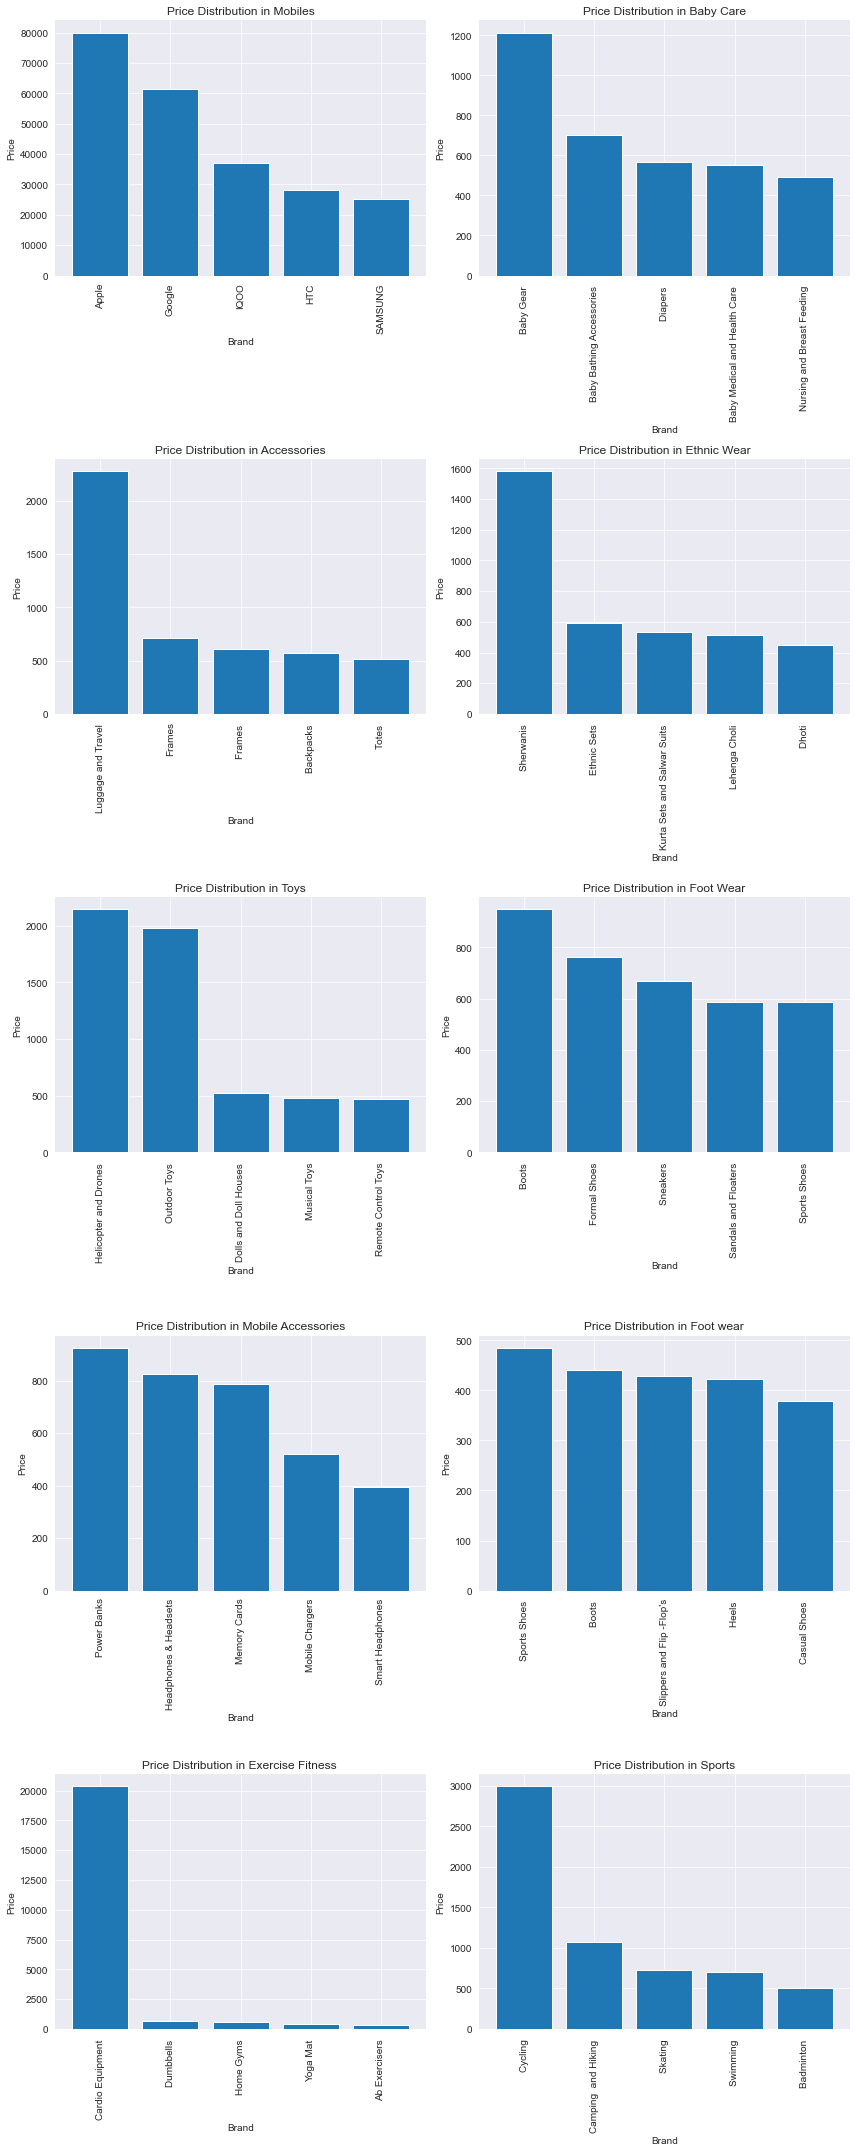

In [60]:
# Setting dark grid
sns.set_style('darkgrid')

# Calculate the number of rows and columns based on the number of bar plots
num_charts = len(top_5_category_3_per_category_2)
num_rows = math.ceil(num_charts / 2)
num_cols = min(num_charts, 2)

# Create subplots with the specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))
axs = axs.flatten() 

# Loop over the list of dictionaries and create bar plots
for i, d in enumerate(top_5_category_3_per_category_2):
    # Get the Category name and brands dictionary
    category2, brand = list(d.items())[0]

    # Get the counts and labels for the bar plot
    counts = list(brand.values())
    labels = list(brand.keys())

    # Create the bar plot
    axs[i].bar(labels, counts)
    axs[i].set_title(f'Price Distribution in {category2}')
    axs[i].set_xlabel('Brand')
    axs[i].set_ylabel('Price')
    axs[i].tick_params(axis='x', rotation=90)
    sns.despine(left=True, bottom=True)

# Remove any empty subplots if the number of charts is not a multiple of 2
if num_charts % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()

# Modelling
## Base Model

In [61]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_df[['ID','selling_price(KSH.)', 'product_rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the model
model1 = KNNBasic(random_state=42)
model1.fit(trainset)

# Evaluate the model
predictions1 = model1.test(testset)
accuracy1 = sup_accuracy.rmse(predictions1)
mae1 = sup_accuracy.mae(predictions1)

# Calculate accuracy
rating_scale = 5
percentage_accuracy = 100 * (1 - (accuracy1 / rating_scale))
print(f'Percentage Accuracy: {percentage_accuracy:.2f}%')


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.6371
MAE:  0.3272
Percentage Accuracy: 87.26%


RMSE (Root Mean Squared Error): The RMSE value of 0.6371 indicates the average difference between the predicted ratings and the actual ratings in the test set. Lower values of RMSE indicate better accuracy.

MAE (Mean Absolute Error): The MAE value of 0.3272 represents the average absolute difference between the predicted ratings and the actual ratings. Similar to RMSE, lower MAE values indicate better accuracy.

Overall, the model demonstrates relatively low RMSE and MAE values, suggesting good accuracy in predicting ratings. An accuracy of 87.26% is quite good but lets see how we can make it better. 

In [62]:
counter = 0
for prediction in predictions1:
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")
    counter += 1
    if counter == 5:
        break

Predicted rating: 4.04
Actual rating: 4.10
---
Predicted rating: 4.04
Actual rating: 4.20
---
Predicted rating: 4.04
Actual rating: 4.20
---
Predicted rating: 4.04
Actual rating: 4.30
---
Predicted rating: 4.04
Actual rating: 4.00
---


The prediction is not that good and we can make it better

## SVD (Singular Value Decomposition)

In [63]:
# Train the model
model2 = SVD(random_state=42)
model2.fit(trainset)

# Evaluate the model
predictions2 = model2.test(testset)
# Test with RMSE
accuracy2 = sup_accuracy.rmse(predictions2)
mae2 = sup_accuracy.mae(predictions2)
# Calculate accuracy
rating_scale = 5
percentage_accuracy = 100 * (1 - (accuracy2 / rating_scale))
print(f'Percentage Accuracy: {percentage_accuracy:.2f}%')

RMSE: 0.6010
MAE:  0.3179
Percentage Accuracy: 87.98%


RMSE (Root Mean Squared Error): The RMSE value of 0.6010 indicates the average difference between the predicted ratings and the actual ratings in the test set. Lower values of RMSE indicate better accuracy.

MAE (Mean Absolute Error): The MAE value of 0.3179 represents the average absolute difference between the predicted ratings and the actual ratings. Similar to RMSE, lower MAE values indicate better accuracy.

Overall, the model demonstrates relatively low RMSE and MAE values, suggesting good accuracy in predicting ratings. An accuracy of 87.98% is quite good but lets see how we can make it more better.

In [64]:
counter = 0
for prediction in predictions2:
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")
    counter += 1
    if counter == 5:
        break

Predicted rating: 3.93
Actual rating: 4.10
---
Predicted rating: 4.04
Actual rating: 4.20
---
Predicted rating: 3.99
Actual rating: 4.20
---
Predicted rating: 4.04
Actual rating: 4.30
---
Predicted rating: 4.05
Actual rating: 4.00
---


The prediction is improving but not yet that good and we can make it better

## KNNwithMeans

In [65]:
# Train the model
model3 = KNNWithMeans(random_state=42)
model3.fit(trainset)

# Evaluate the model
predictions3 = model3.test(testset)

# Test with RMSE
accuracy3 = sup_accuracy.rmse(predictions3)
mae3 = sup_accuracy.mae(predictions3)

# Calculate accuracy
rating_scale = 5
percentage_accuracy = 100 * (1 - (accuracy3 / rating_scale))
print(f'Percentage Accuracy: {percentage_accuracy:.2f}%')

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.6371
MAE:  0.3272
Percentage Accuracy: 87.26%


RMSE (Root Mean Squared Error): The RMSE value of 0.6371 indicates the average difference between the predicted ratings and the actual ratings in the test set. Lower values of RMSE indicate better accuracy.

MAE (Mean Absolute Error): The MAE value of 0.3272 represents the average absolute difference between the predicted ratings and the actual ratings. Similar to RMSE, lower MAE values indicate better accuracy.

Overall, the model demonstrates relatively low RMSE and MAE values, suggesting good accuracy in predicting ratings. An accuracy of 87.26% is similar to the base model and is quite good but lets see how we can make it more better.

In [66]:
counter = 0
for prediction in predictions3:
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")
    counter += 1
    if counter == 5:
        break

Predicted rating: 4.04
Actual rating: 4.10
---
Predicted rating: 4.04
Actual rating: 4.20
---
Predicted rating: 4.04
Actual rating: 4.20
---
Predicted rating: 4.04
Actual rating: 4.30
---
Predicted rating: 4.04
Actual rating: 4.00
---


The prediction is similar to the one of the base model, good but not yet that good and we can make it better

## SVDpp(Singular Value Decomposition Plus Plus)

In [67]:
# Define the item-based collaborative filtering model
model4 = SVDpp(reg_bu=0.02, reg_bi=0.02, reg_pu=0.02, reg_qi=0.02, reg_yj=0.02,random_state=42)

# Train the model
model4.fit(trainset)

# Make predictions on the test set
predictions4 = model4.test(testset)

# Evaluate the model using RMSE
rmse_score4 = sup_accuracy.rmse(predictions4)
mae4 = sup_accuracy.mae(predictions4)

# Calculate accuracy
rating_scale = 5
percentage_accuracy = 100 * (1 - (rmse_score4 / rating_scale))
print(f'Percentage Accuracy: {percentage_accuracy:.2f}%')

RMSE: 0.6001
MAE:  0.3168
Percentage Accuracy: 88.00%


RMSE (Root Mean Squared Error): The RMSE value of 0.6001 indicates the average difference between the predicted ratings and the actual ratings in the test set. Lower values of RMSE indicate better accuracy.

MAE (Mean Absolute Error): The MAE value of 0.3168 represents the average absolute difference between the predicted ratings and the actual ratings. Similar to RMSE, lower MAE values indicate better accuracy.

Overall, the model demonstrates relatively low RMSE and MAE values, suggesting good accuracy in predicting ratings. An accuracy of 88.00% quite improved and good but lets see how we can make it more better by Regularization of the svdpp model.

In [68]:
counter = 0
for prediction in predictions4:
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")
    counter += 1
    if counter == 5:
        break

Predicted rating: 3.92
Actual rating: 4.10
---
Predicted rating: 4.04
Actual rating: 4.20
---
Predicted rating: 4.02
Actual rating: 4.20
---
Predicted rating: 4.04
Actual rating: 4.30
---
Predicted rating: 4.12
Actual rating: 4.00
---


The prediction is improving but not yet that good and we can make it better

## Regularization of the svdpp model.

In [69]:
# Define the item-based collaborative filtering model
model5 = SVDpp(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.02, random_state=42)

# Train the model
model5.fit(trainset)

# Make predictions on the test set
predictions5 = model5.test(testset)

# Evaluate the model using RMSE
rmse_score5 = sup_accuracy.rmse(predictions5)
mae5 = sup_accuracy.mae(predictions5)

# Calculate accuracy
rating_scale = 5
percentage_accuracy = 100 * (1 - (rmse_score5 / rating_scale))
print(f'Percentage Accuracy: {percentage_accuracy:.2f}%')

RMSE: 0.6087
MAE:  0.3191
Percentage Accuracy: 87.83%


RMSE (Root Mean Squared Error): The RMSE value of 0.6087 indicates the average difference between the predicted ratings and the actual ratings in the test set. Lower values of RMSE indicate better accuracy.

MAE (Mean Absolute Error): The MAE value of 0.3191 represents the average absolute difference between the predicted ratings and the actual ratings. Similar to RMSE, lower MAE values indicate better accuracy.

Overall, the model demonstrates relatively low RMSE and MAE values, suggesting good accuracy in predicting ratings. An accuracy of 87.83% quite reduced due to the Regularization of the svdpp model but lets see how we can make it more better.

In [70]:
counter = 0
for prediction in predictions5:
    print(f"Predicted rating: {prediction.est:.2f}")
    print(f"Actual rating: {prediction.r_ui:.2f}")
    print("---")
    counter += 1
    if counter == 5:
        break

Predicted rating: 3.97
Actual rating: 4.10
---
Predicted rating: 4.04
Actual rating: 4.20
---
Predicted rating: 4.01
Actual rating: 4.20
---
Predicted rating: 4.04
Actual rating: 4.30
---
Predicted rating: 4.05
Actual rating: 4.00
---


The prediction is deprived but we can make it better

## Ensemble Methods
Ensemble methods combine multiple base models to improve the overall predictive performance.

We use the voting-based ensemble method called "Majority Voting" or "Voting Classifier". This method combines the predictions from multiple base models and selects the recommendation with the majority of votes.

In [71]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_df[['ID','selling_price(KSH.)', 'product_rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
# Define the base models
models = [
    SVD(random_state=42),
    SVDpp(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.02, random_state=42),
    SVDpp(random_state=42)
]

# Train the base models
model_predictions = []
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    model_predictions.append(predictions)

# Combine the predictions from the base models
blended_predictions = []
for i in range(len(testset)):
    ratings = [pred[i].est for pred in model_predictions]
    blended_rating = sum(ratings) / len(ratings)
    user, item, true_rating = testset[i]
    blended_predictions.append((user, item, true_rating, blended_rating, None))

# Evaluate the blended predictions
blended_rmse = sup_accuracy.rmse(blended_predictions)
blended_mae = sup_accuracy.mae(blended_predictions)

# Calculate accuracy
rating_scale = 5
percentage_accuracy = 100 * (1 - (blended_rmse / rating_scale))
print(f'Percentage Accuracy: {percentage_accuracy:.2f}%')


RMSE: 0.6026
MAE:  0.3174
Percentage Accuracy: 87.95%


RMSE (Root Mean Squared Error): The RMSE value of 0.6026 indicates the average difference between the predicted ratings and the actual ratings in the test set. Lower values of RMSE indicate better accuracy.

MAE (Mean Absolute Error): The MAE value of 0.3174 represents the average absolute difference between the predicted ratings and the actual ratings. Similar to RMSE, lower MAE values indicate better accuracy.

Overall, the model demonstrates relatively low RMSE and MAE values, suggesting good accuracy in predicting ratings. An accuracy of 87.95% quite reduced due to the Ensemble methods  but lets see how we can make it more better by scaling the dataset.

In [72]:
# Apply MinMaxScaler to 'selling_price(KSH.)', 'product_rating' columns
scaler = MinMaxScaler()
merged_df_scaled = merged_df.copy()
merged_df_scaled[['selling_price(KSH.)', 'product_rating']] = scaler.fit_transform(merged_df[['selling_price(KSH.)', 'product_rating']])

In [73]:
# Load the data into Surprise Dataset format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(merged_df_scaled[['ID','selling_price(KSH.)', 'product_rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
# Define the base models
models = [
    SVD(random_state=42),
    SVDpp(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.02, random_state=42),
    SVDpp(random_state=42)
]

# Train the base models
model_predictions = []
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    model_predictions.append(predictions)

# Combine the predictions from the base models
blended_predictions = []
for i in range(len(testset)):
    ratings = [pred[i].est for pred in model_predictions]
    blended_rating = sum(ratings) / len(ratings)
    user, item, true_rating = testset[i]
    blended_predictions.append((user, item, true_rating, blended_rating, None))

# Evaluate the blended predictions
blended_rmse = sup_accuracy.rmse(blended_predictions)
blended_mae = sup_accuracy.mae(blended_predictions)

# Calculate accuracy
rating_scale = 5
percentage_accuracy = 100 * (1 - (blended_rmse / rating_scale))
print(f'Percentage Accuracy: {percentage_accuracy:.2f}%')


RMSE: 0.2337
MAE:  0.1960
Percentage Accuracy: 95.33%


RMSE (Root Mean Squared Error): The RMSE value of 0.2337 indicates the average difference between the predicted ratings and the actual ratings in the test set. Lower values of RMSE indicate better accuracy.

MAE (Mean Absolute Error): The MAE value of 0.1960 represents the average absolute difference between the predicted ratings and the actual ratings. Similar to RMSE, lower MAE values indicate better accuracy.

Overall, the model demonstrates relatively low RMSE and MAE values, suggesting good accuracy in predicting ratings. An accuracy of 95.33% improved a great deal due to the scaling the dataset but lets see how we can make it more better by cross validation.

## Cross Validation

In [74]:
# Define the model
model = SVDpp()
# Perform cross-validation
cv_results = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)
# Access the RMSE scores for each fold
rmse_scores = cv_results['test_rmse']
# Calculate the average RMSE
avg_rmse = sum(rmse_scores) / len(rmse_scores)
print("Cross-Validation Results")
print("RMSE Scores:", rmse_scores)
print("Average RMSE:", avg_rmse)
# Calculate accuracy
rating_scale = 5
percentage_accuracy = 100 * (1 - (avg_rmse / rating_scale))
print(f'Percentage Accuracy: {percentage_accuracy:.2f}%')

Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2191  0.2284  0.2237  0.2264  0.2313  0.2258  0.0042  
Fit time          4.03    4.21    3.78    2.67    2.36    3.41    0.75    
Test time         0.03    0.15    0.03    0.05    0.03    0.06    0.05    
Cross-Validation Results
RMSE Scores: [0.21908388 0.22843646 0.22373284 0.22641079 0.23132491]
Average RMSE: 0.22579777571268914
Percentage Accuracy: 95.48%


RMSE (Root Mean Squared Error): The RMSE value of 0.2257228817832378 indicates the average difference between the predicted ratings and the actual ratings in the test set. Lower values of RMSE indicate better accuracy.

MAE (Mean Absolute Error): The MAE value of 0.1960 represents the average absolute difference between the predicted ratings and the actual ratings. Similar to RMSE, lower MAE values indicate better accuracy.

Overall, the model demonstrates relatively low RMSE and MAE values, suggesting good accuracy in predicting ratings. An accuracy of 95.49% improved a great deal due to cross validation and this works as the best model.

## Model Selection
### Model Selection 1
Below we will go further and develop the recomendation system itself.

In [75]:
# creating a relevant columns from the above dataset 
vectorization_columns = merged_df[['title', 'category_2', 'category_3' ]]
vectorization_columns

,title,category_2,category_3
0,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,Sports,Cricket
1,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,Sports,Cricket
2,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,Sports,Cricket
3,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,Sports,Cricket
4,CEAT Hitman Full Size Double Blade Poplar Cric...,Sports,Cricket
...,...,...,...
15150,Blazing Black 6 GB 128 GB SAMSUNG M52 5G,Mobiles,SAMSUNG
15151,Icy Blue 6 GB 128 GB SAMSUNG M52 5G,Mobiles,SAMSUNG
15152,Icy Blue 8 GB 128 GB SAMSUNG M52 5G,Mobiles,SAMSUNG
15153,Slate Black 8 GB 128 GB SAMSUNG M52 5G,Mobiles,SAMSUNG


The purpose of the code below is to convert relevant data into a list of strings and then apply TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to the list of strings. we will use some key columns to get this matrix.

In [76]:
# Convert relevant data into a list of strings
documents = []
for _, row in vectorization_columns.iterrows():
    category_2 = row['category_2']
    category_3 = row['category_3']
    title = row['title']
    doc = f"{category_2} {category_3} {title}"
    documents.append(doc)

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(documents)

The TF-IDF matrix represents the numerical representation of the text data, where each row corresponds to a document, and each column represents a specific term. The values in the matrix indicate the importance of each term in each document based on its frequency and inverse document frequency.

This process of converting text data into a numerical representation allows for the application of machine learning algorithms that require numerical input.

In [77]:
# Compute cosine similarity matrix
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

By passing tfidf_matrix as both arguments, the linear_kernel function computes the cosine similarity between each pair of documents in the TF-IDF matrix.

The resulting cosine_similarities matrix is a square matrix, where each element represents the cosine similarity score between a pair of documents.

The cosine similarity score measures the similarity between two vectors (in this case, the TF-IDF vectors of the documents) based on the cosine of the angle between them. Higher values indicate greater similarity, while lower values indicate dissimilarity.

The resulting cosine_similarities matrix can be used for tasks such as document similarity analysis, document clustering, or recommendation systems.

In [78]:
def get_item_recommendations(id, cosine_similarities, top_n=5):
    # Get similarity scores for the item
    item_scores = list(enumerate(cosine_similarities[id]))

    # Sort items based on similarity scores
    item_scores = sorted(item_scores, key=lambda x: x[1], reverse=True)

    return item_scores[1 : top_n + 1]

# Get recommendations for a specific item (e.g., item with index 0)
id = 0
recommendations = get_item_recommendations(id, cosine_similarities)

# Print the top 5 recommendations
for id, similarity in recommendations:
    print(f" ID: {id}, Similarity: {similarity}")

 ID: 1, Similarity: 0.7885027523484736
 ID: 3, Similarity: 0.5354138954885778
 ID: 5, Similarity: 0.5354138954885778
 ID: 30, Similarity: 0.47362152415784997
 ID: 9, Similarity: 0.45694809650863466


The code above allows us to easily retrieve top item recommendations based on the cosine similarity. We can specify the item index for which we want recommendations and customize the number of top recommendations to retrieve.

### Model selection 2
We will create a new matrix now only using the title column

In [79]:
# Construct the TF-IDF Matrix
tfidfv2=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix2=tfidfv2.fit_transform(merged_df['title'])
print(tfidfv_matrix2.todense())
tfidfv_matrix2.todense().shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(15073, 12932)

In [80]:
# Calculate similarity matrix
cosine_sim2 = cosine_similarity(tfidfv_matrix2, tfidfv_matrix2)

We will then create an index dataframe of the name column to be used in the recomender.

In [81]:
# Create a Pandas Series to map movie titles to their indices
indices = pd.Series(data = list(merged_df.index), index = merged_df['title'])
indices

title
ITWOSERVICES CRICKET NET 100X10 CRICKET NET NYLON HDPE Cricket Net  (Green)                                      0
ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 10X10 FEET Cricket Net  (Green)                                     1
VICTORY Medium Weight ( Pack of 1 ) Rubber Cricket Tennis Ball Cricket Rubber Ball  (Pack of 1)                  2
VICTORY Cricket Wind Ball (Pack of 1) - Made in India Smooth Cricket Cricket Synthetic Ball  (Pack of 1)         3
CEAT Hitman Full Size Double Blade Poplar Cricket Bat - Advance Play Poplar Willow Cricket  Bat  (1.2 kg)        4
                                                                                                             ...  
Blazing Black 6 GB 128 GB SAMSUNG M52 5G                                                                     15150
Icy Blue 6 GB 128 GB SAMSUNG M52 5G                                                                          15151
Icy Blue 8 GB 128 GB SAMSUNG M52 5G                                       

### Title recommender
Below we will use the above indices and similarities to recomed items based on the title.

In [82]:
# this is a function to recomend item
def recommend_item(title, cosine_similarity, cosine_sim2, merged_df):
    # Create a dictionary to map item name to their indices
    indices = {title: index for index, category_2 in enumerate(merged_df['title'])}

    # Get the index of the item that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all items with that title
    sim_scores = list(enumerate((np.dot(cosine_sim2[idx], cosine_similarities))))

    # Sort the item based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar names
    sim_scores = sim_scores[1:11]

    # Get the names indices
    indices = [x for x, _ in sim_scores]

    # Return the top 10 most similar item names
    recommended_item = merged_df.set_index(merged_df['title']).iloc[indices][
            [
                'category_2',
                'category_3',  
                'product_rating',
                'selling_price(KSH.)'
            ]
        ]

    return recommended_item

In [83]:
recommend_item("title", cosine_similarities, cosine_sim2, merged_df)

,category_2,category_3,product_rating,selling_price(KSH.)
title,,,,
Blue 6 GB 128 GB SAMSUNG Galaxy A12,Mobiles,SAMSUNG,3.9,15271.0
Blue 6 GB 128 GB SAMSUNG Galaxy A12,Mobiles,SAMSUNG,3.9,16499.0
Blue 4 GB 128 GB SAMSUNG Galaxy A12,Mobiles,SAMSUNG,4.2,14999.0
Black 6 GB 128 GB SAMSUNG Galaxy A12,Mobiles,SAMSUNG,3.9,15843.0
Black 6 GB 128 GB SAMSUNG Galaxy A12,Mobiles,SAMSUNG,3.9,16499.0
Black 6 GB 128 GB SAMSUNG Galaxy A12,Mobiles,SAMSUNG,3.9,14999.0
Black 6 GB 128 GB SAMSUNG Galaxy A12,Mobiles,SAMSUNG,3.9,14999.0
Black 4 GB 128 GB SAMSUNG Galaxy A12,Mobiles,SAMSUNG,4.2,14999.0
Blue 6 GB 128 GB SAMSUNG Galaxy A7,Mobiles,SAMSUNG,4.4,24600.0


### Rating recommender
Below we will use the above indices and similarities to recomed items based on the rating.

In [84]:
def recommend_item_(cosine_sim2, cosine_similarities, rating_threshold):
    # Filter the DataFrame based on the rating threshold
    recommendations = merged_df[merged_df['product_rating'] == rating_threshold][['category_2', 'category_3', 'title', 'product_rating',
       'selling_price(KSH.)']]
    # Reset the index of the recommendations DataFrame
    recommendations.reset_index(drop=True, inplace=True)

    return recommendations

In [85]:
recommend_item_(cosine_sim2, cosine_similarities, 5)

,category_2,category_3,title,product_rating,selling_price(KSH.)
0,Sports,Camping and Hiking,"Balavee BC-89 and SA67 Set of 2 Multi Tool, Ca...",5.0,888.44
1,Sports,Swimming,"IO Adult Swimming Goggles, Blue Swimming Goggl...",5.0,371.64
2,Sports,Swimming,A Sharif AS-25 Lifebuoy ring Swim Floatation Belt,5.0,1747.24
3,Exercise Fitness,Ab Exercisers,"LIVOX Pushup Rack Board And Toning tube, Ab wh...",5.0,531.24
4,Food Essentials,Nuts and Dry Fruits,Bodywise Ayurvedic PCOS Balance Capsules 60 No...,5.0,682.48
...,...,...,...,...,...
82,Mobiles,SAMSUNG,Black 100 MB 100 MB SAMSUNG SM-B310EZDDINS,5.0,1949.00
83,Mobiles,vivo,Shimmer Blue 12 GB 256 GB vivo X60 Pro,5.0,48780.00
84,Mobiles,vivo,Frost Blue 8 GB 256 GB vivo X50,5.0,44990.00
85,Mobiles,vivo,Phantom Purple 6 GB 64 GB vivo Z1x,5.0,19990.00


### Category_2 recommender
Below we will use the above indices and similarities to recomed items based on the category_2.

In [86]:
# this is a function that recommends based on the category_2
def recommend_category_2(category_2, cosine_sim2, cosine_similarities, data):
    # Create a dictionary to map category_2 titles to their indices
    indices = {title: index for index, title in enumerate(merged_df['category_2'])}

    # Get the index of the category_2
    # that matches the title
    idx = indices[category_2]

    # Get the pairwise similarity scores of all category_2 with that name
    sim_scores = list(enumerate(np.dot(cosine_sim2[idx], cosine_similarities)))

    # Sort the category_2 based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar category_2
    sim_scores = sim_scores[1:11]

    # Get the category_2 indices
    indices = [x for x, _ in sim_scores]

    # Return the top most similar category_2
    recommended_category_2 = merged_df.set_index('category_2').iloc[indices][
            [
                'title',
                'category_3',  
                'product_rating',
                'selling_price(KSH.)'
            ]
        ]

    filtered_recommendations = recommended_category_2[recommended_category_2.index == category_2]

    return pd.DataFrame(filtered_recommendations)

In [87]:
recommend_category_2('Sports', cosine_sim2, cosine_similarities, merged_df)

,title,category_3,product_rating,selling_price(KSH.)
category_2,,,,
Sports,VIAGGI EAR PLUG WITH WIRE Set of 1(2 pairs ear...,Swimming,4.2,209.00
Sports,VIAGGI EAR PLUG WITH WIRE Set of 2(4 pairs ear...,Swimming,4.2,418.00
Sports,DECENT AIR SYSTEM Ear Protectors Disposable Co...,Swimming,4.0,156.56
Sports,VIAGGI Soft Silicone Blue Ear Plugs ( Set of 3...,Swimming,1.0,646.00
Sports,VIAGGI SOFT SILICONE BLUE EAR PLUGS Ear Plug ...,Swimming,3.4,227.24
Sports,DALUCI Waterproof Swimming Professional Silico...,Swimming,3.8,129.20
Sports,VIAGGI New Silicone Inflight Ear Plugs Pack of...,Swimming,4.2,893.00
Sports,SSWW 3M Ear Plugs Noise Reducing 1 Pair for Me...,Swimming,3.8,112.48


### Category_3 recommender
Below we will use the above indices and similarities to recomed items based on the category_3.

In [88]:
# this is a function to recomend places
def recommend_category_3(category_3, cosine_similarity, cosine_sim2, data):
    # Create a dictionary to map place name to their indices
    indices = {title: index for index, title in enumerate(merged_df['category_3'])}

    # Get the index of the place that matches the name
    idx = indices[category_3]

    # Get the pairwise similarity scores of all places with that name
    sim_scores = list(enumerate((np.dot(cosine_sim2[idx], cosine_similarities))))

    # Sort the places based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar names
    sim_scores = sim_scores[1:50]

    # Get the names indices
    indices = [x for x, _ in sim_scores]

    # Return the top 10 most similar place names
    recommended_category_3 = clean_df.set_index('name').iloc[indices][
            [
                'title',
                'category_2',  
                'product_rating',
                'selling_price(KSH.)',
            ]
        ]

    filtered_recommendations = recommended_category_3[recommended_category_3.index == category_3]

    return pd.DataFrame(filtered_recommendations)

In [89]:
recommend_category_3('Cricket', cosine_similarity, cosine_sim2, merged_df)

KeyError: 'Cricket'